In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

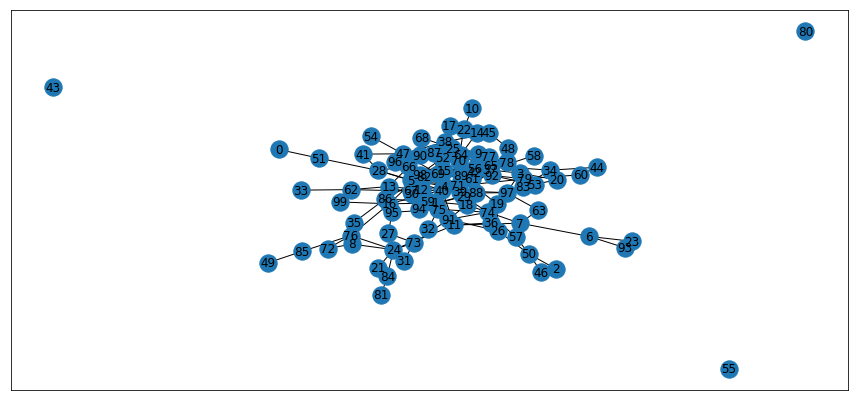

In [10]:
#Генерация случайного графа Эрдеша-Реньи со 100 вершинами и 0.04 вероятностью проведения ребра
er = nx.erdos_renyi_graph(100, 0.03)
plt.figure(figsize=(15,7))
nx.draw_networkx(er, with_labels=True)

# Гигантская компонента связности

Ссылаяясь на доказательство Райгородского (https://mcnmo.ru/free-books/dubna/raigor-4.pdf страница 47, 2.5.4), получаем следующую зависимость наличия гиганской компоненты связности и вероятности проведения ребра. Если p - вероятность провести ребро, а n - число вершин в графе, то 

при p << 1/n - нет компоненты

p ~  1/n - поведение неясно, происходит фазовый переход

при p >> 1/n - ожидается появление гиганской компоненты

Покажем различия визуально. Для n=50 построим 3 графа с разными p, иллюстрирующими разное поведение графов.

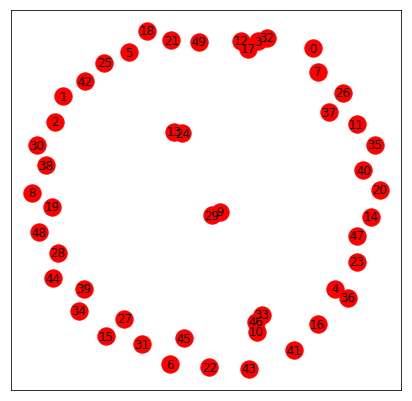

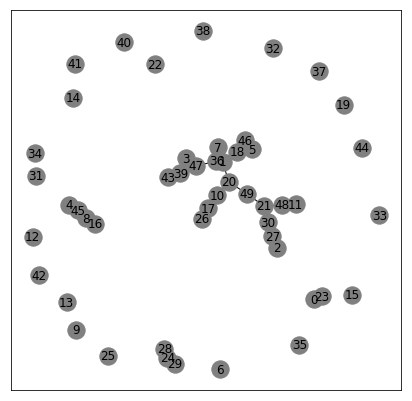

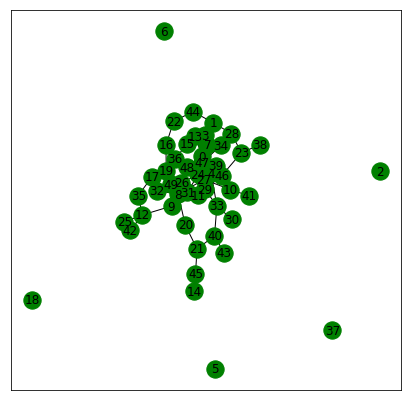

In [26]:
er = nx.erdos_renyi_graph(50, 0.01)
plt.figure(figsize=(7,7))
nx.draw_networkx(er, with_labels=True, node_color='red')
#При p = 0.01 наблюдаем разреженный граф без намека на компоненту связности

er = nx.erdos_renyi_graph(50, 0.02)
plt.figure(figsize=(7,7))
nx.draw_networkx(er, with_labels=True, node_color='gray')
#При p = 1/50 = 0.02 наблюдаем неопределенное поведение: отдельные вершины собираются в мелкие компоненты связности

er = nx.erdos_renyi_graph(50, 0.05)
plt.figure(figsize=(7,7))
nx.draw_networkx(er, with_labels=True, node_color='green')
#При p = 0.05 наблюдаем ярко выраженную, основную и единственную компоненту связности


Взяв за основу граф размера 200 вершин проведем эксперименты, варьируя вероятность простроения ребра от 1/50 до 1/400. Для более общей картины для каждой вероятности генерируется 10000 графов и находится средний размер максимальной компоненты связности. Так, общая зависимость размера компоненты от вероятности выглядит следующим образом.

In [58]:
components = {0.1: 200.0,
 0.02: 196.0963,
 0.01: 158.488,
 0.006666666666666667: 82.1089,
 0.00625: 67.4222,
 0.0058823529411764705: 55.3665,
 0.005555555555555556: 45.0771,
 0.005263157894736842: 37.2804,
 0.005: 31.574,
 0.004761904761904762: 26.7318,
 0.004545454545454545: 23.7038,
 0.004347826086956522: 20.6228,
 0.004166666666666667: 18.798,
 0.004: 16.9211,
 0.0033333333333333335: 11.5452,
 0.0032258064516129032: 11.0372,
 0.003125: 10.3874,
 0.0030303030303030303: 9.9237,
 0.0029411764705882353: 9.3668,
 0.002857142857142857: 9.0002,
 0.002777777777777778: 8.6448,
 0.002702702702702703: 8.3884,
 0.0125: 178.336,
 0.011111111111111112: 169.4692,
 0.00909090909090909: 146.5,
 0.008333333333333333: 132.116,
 0.007692307692307693: 116.3902,
 0.007142857142857143: 99.1114,
 0.0064516129032258064: 74.6799,
 0.006060606060606061: 60.8424,
 0.005714285714285714: 50.0828,
 0.005405405405405406: 41.0335,
 0.005128205128205128: 34.4325,
 0.004878048780487805: 28.9873,
 0.004651162790697674: 25.0824,
 0.0044444444444444444: 21.9269,
 0.00425531914893617: 19.5677,
 0.004081632653061225: 17.528,
 0.0038461538461538464: 15.4842,
 0.003703703703703704: 14.3037,
 0.0035714285714285713: 13.2218,
 0.0034482758620689655: 12.3138}

In [59]:
comp_prob = sorted([p for p in components])
comp_value = [components[p] for p in comp_prob]

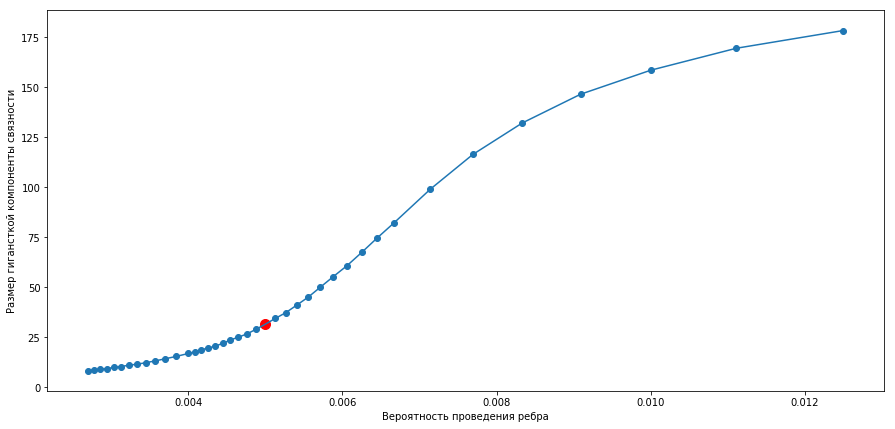

In [60]:
plt.figure(figsize=(15,7))
plt.plot(comp_prob[:-2], comp_value[:-2])
plt.scatter(comp_prob[:-2], comp_value[:-2])
plt.scatter(1/200, components[1/200], c='red', s=100)
plt.xlabel("Вероятность проведения ребра")
plt.ylabel("Размер гигансткой компоненты связности")
plt.show()

Из графика видно, что размер гиганской компоненты связности пропорционален вероятности проведения ребра, то есть мы имеем дело с монотонной функцией.

Красным выделена точка смены поведения при p=1/n (1/200 в нашем случае), в которой размер максимальной компоненты равен 31.5 вершин. Логично рассмотреть график до и после этой точки, так как большой диапазон значений вносит трудности в анализ графика. 

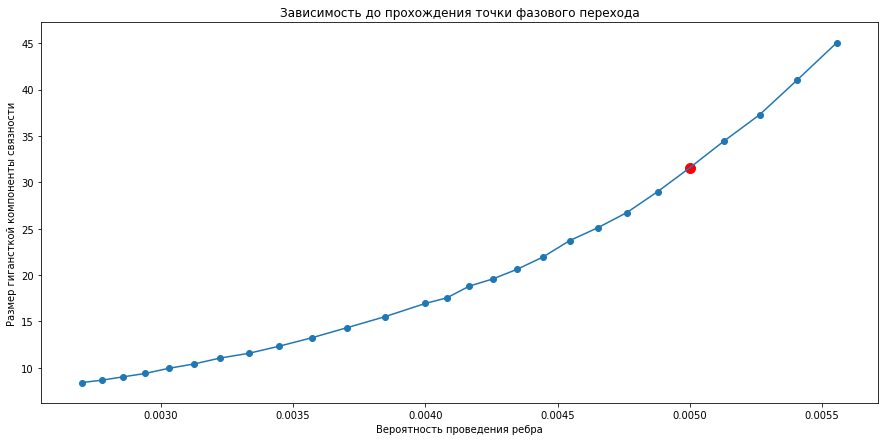

In [62]:
plt.figure(figsize=(15,7))
plt.plot(comp_prob[:-15], comp_value[:-15])
plt.scatter(comp_prob[:-15], comp_value[:-15])
plt.scatter(1/200, components[1/200], c='red', s=100)
plt.xlabel("Вероятность проведения ребра")
plt.ylabel("Размер гигансткой компоненты связности")
plt.title("Зависимость до прохождения точки фазового перехода")
plt.show()

Приближенный график показывает, что до прохождения точки фазового перехода размер максимальной компоненты связности растет экспоненциально относительно вероятности.

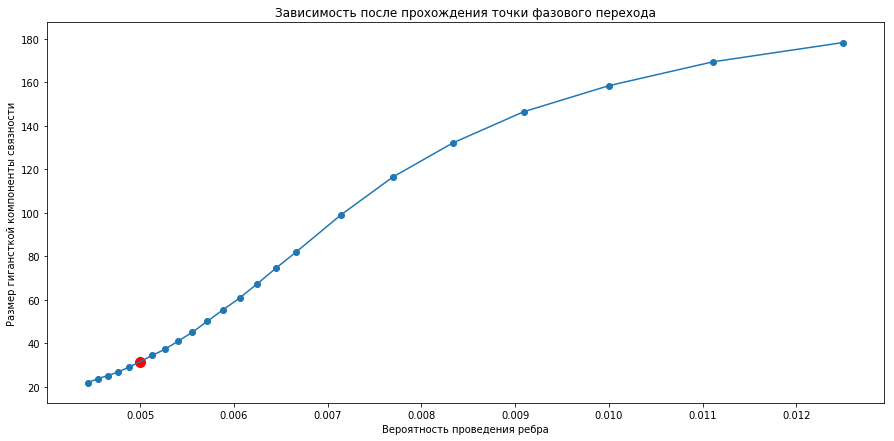

In [68]:
plt.figure(figsize=(15,7))
plt.plot(comp_prob[17:-2], comp_value[17:-2])
plt.scatter(comp_prob[17:-2], comp_value[17:-2])
plt.scatter(1/200, components[1/200], c='red', s=100)
plt.xlabel("Вероятность проведения ребра")
plt.ylabel("Размер гигансткой компоненты связности")
plt.title("Зависимость после прохождения точки фазового перехода")
plt.show()

Приближенный график показывает, что после прохождения точки фазового перехода размер максимальной компоненты связности растет логарифмически относительно вероятности. То есть размер компоненты связности увеличивается медленнее, чем до точки перехода. Это поведение логично, так как с ростом основного кластера новые ребра все реже соединяют разреженные компоненты связности и все сильнее соединяют вершины внутри кластера.

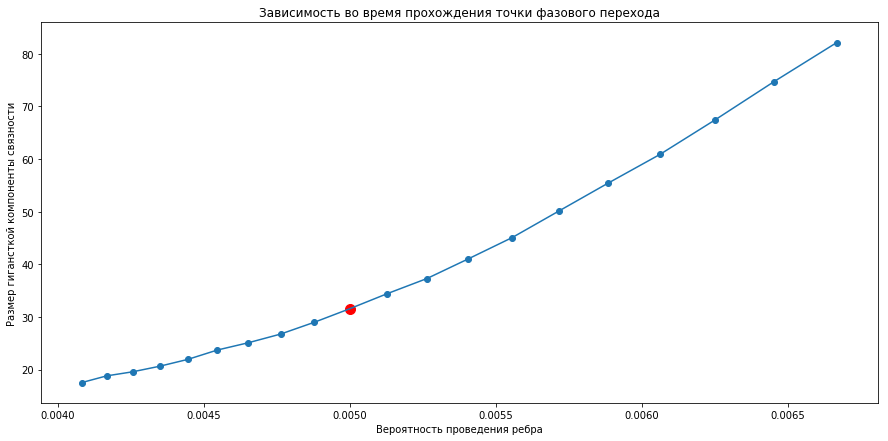

In [72]:
plt.figure(figsize=(15,7))
plt.plot(comp_prob[13:33], comp_value[13:33])
plt.scatter(comp_prob[13:33], comp_value[13:33])
plt.scatter(1/200, components[1/200], c='red', s=100)
plt.xlabel("Вероятность проведения ребра")
plt.ylabel("Размер гигансткой компоненты связности")
plt.title("Зависимость во время прохождения точки фазового перехода")
plt.show()

В малой окрестности переходной точки (p от 0.04 до 0.065) наблюдается четырехкратное увеличение размера максимальной компоненты связности с 20 до 80 вершин и максимальный рост функции. Это значит, что после прохождения этой окрестности мы получим граф, где большинство вершин будет связано между собой. (ПОУМНЕЕ ВЫВОД?)